In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

In [3]:
df.duplicated().sum()

0

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print(df.columns) # Te da todas las columnas
print(df.dtypes) # Sirve para ver los tipos de variables

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [9]:
df_original = df.copy()

In [10]:
# df_a es el original, _b será eliminando outliers, _c usando clip y _d con imputaciones
df_a = df_original.copy()
df_b = df_original.copy()
df_c = df_original.copy()
df_d = df_original.copy()

In [11]:
# df.columns = ['embarazos', 'glucosa', 'presion_arterial', 'grosor_piel', 'insulina', 'imc', 'predisposicion_diabetes', 'edad', 'diagnotico']


In [12]:
cols_num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

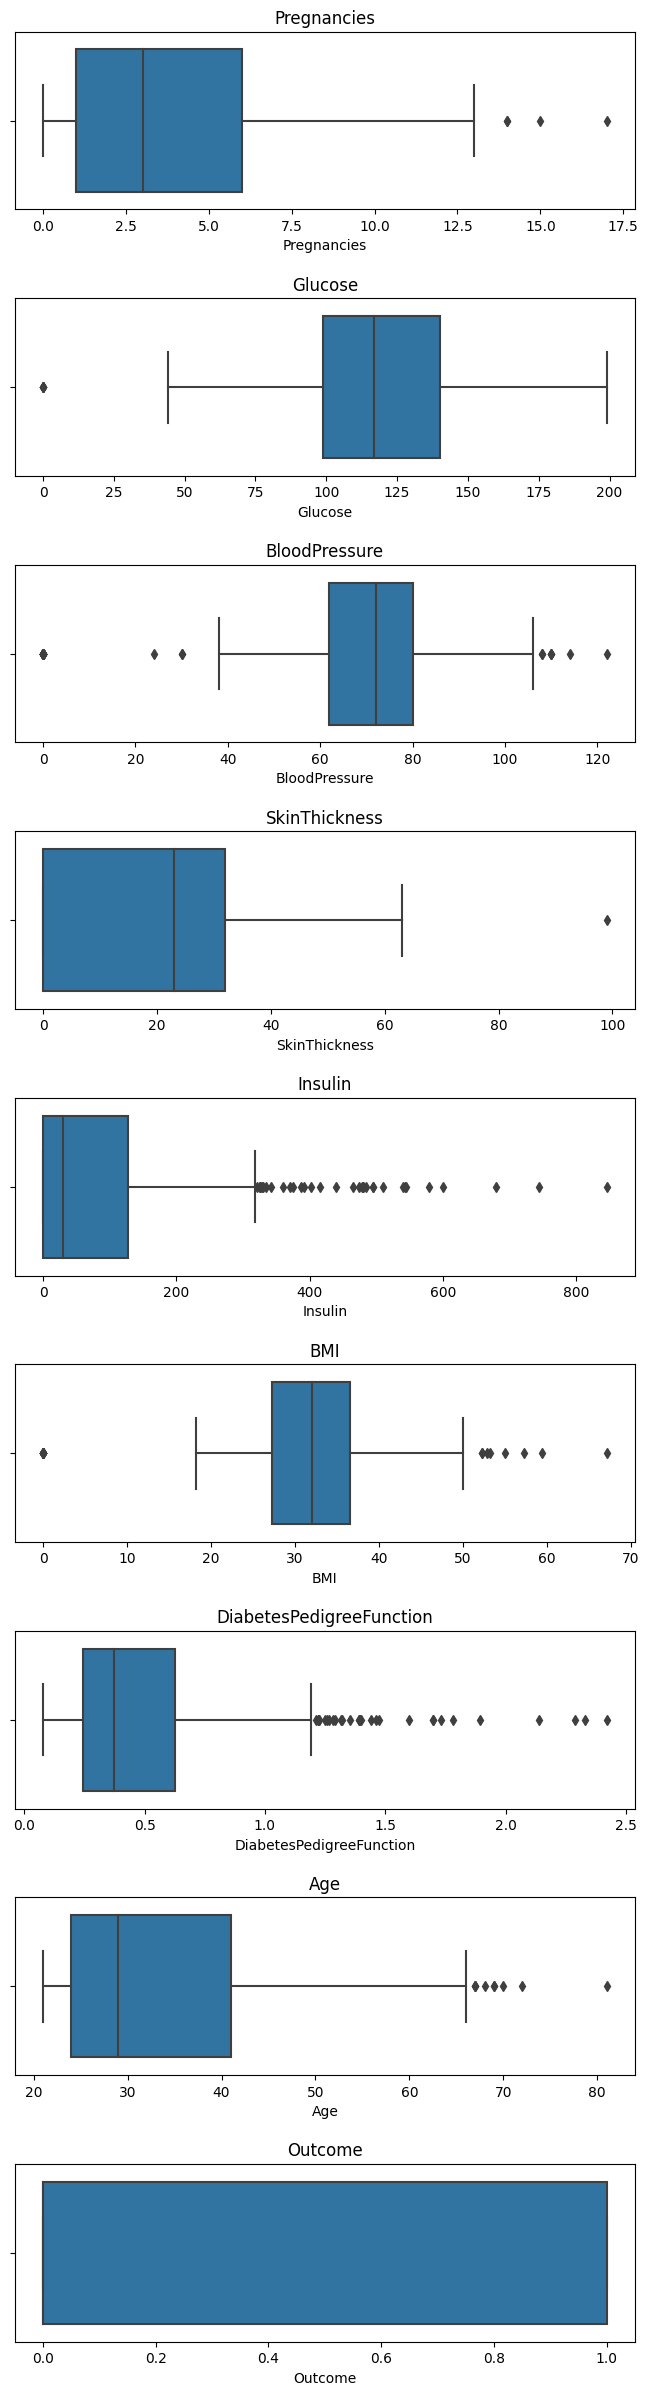

In [13]:
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

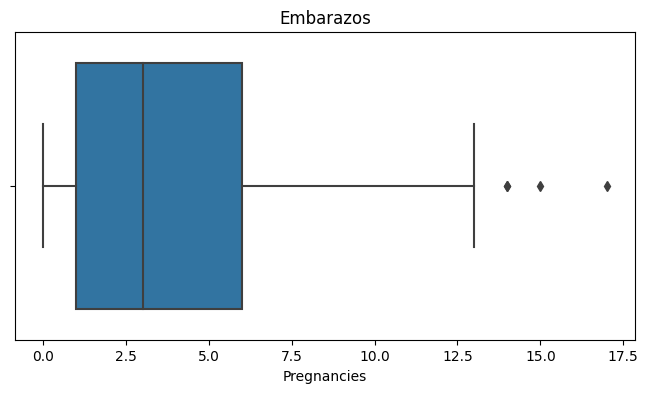

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pregnancies', data=df_b)
plt.title('Embarazos')
plt.show()

In [15]:
df_b[df_b["Pregnancies"] >= 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
357,13,129,0,30,0,39.9,0.569,44,1
455,14,175,62,30,0,33.6,0.212,38,1


In [16]:
print(df_b['Pregnancies'].value_counts().sort_index())


Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64


In [17]:
print("Registros antes de borrar los embarazos menores o iguales a 13:", len(df_b))
df_b = df_original[df_original['Pregnancies'] <= 13]
print("Registros después de borrar los embarazos menores o iguales a 13:", len(df_b))


Registros antes de borrar los embarazos menores o iguales a 13: 768
Registros después de borrar los embarazos menores o iguales a 13: 764


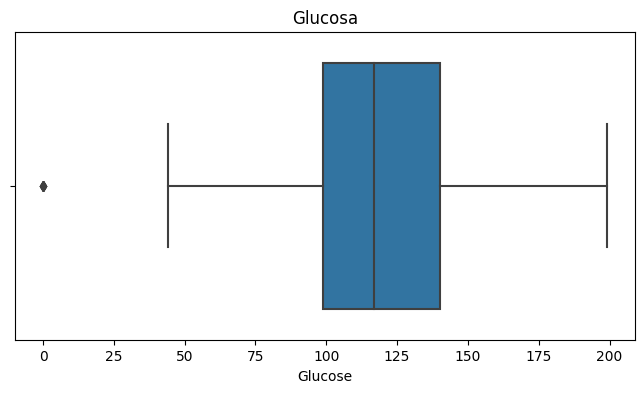

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Glucose', data=df_original)
plt.title('Glucosa')
plt.show()

In [19]:
print(df_original['Glucose'].value_counts().sort_index())

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: count, Length: 136, dtype: int64


In [20]:
print("Registros antes de borrar los que son igual a 0 en glucosa:", len(df_b))
df_b = df_b[df_b['Glucose'] != 0]
print("Registros después de borrar los que son igual a 0 en glucosa:", len(df_b))

Registros antes de borrar los que son igual a 0 en glucosa: 764
Registros después de borrar los que son igual a 0 en glucosa: 759


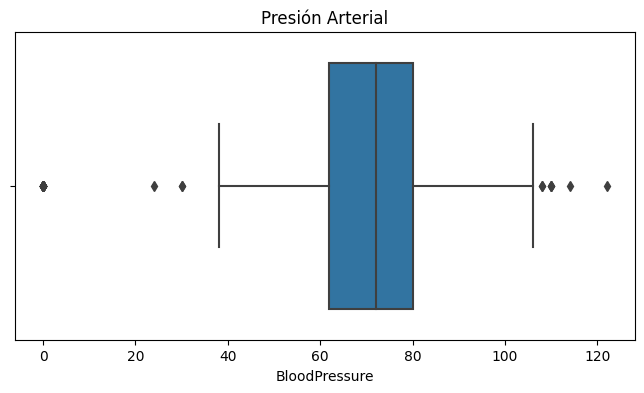

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='BloodPressure', data=df_b)
plt.title('Presión Arterial')
plt.show()

In [22]:
print(df_b['BloodPressure'].value_counts().sort_index())

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      4
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     33
64     43
65      7
66     30
68     43
70     56
72     43
74     51
75      8
76     39
78     44
80     39
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: count, dtype: int64


In [23]:
print("Registros antes de borrar las presiones menores o iguales a 40:", len(df_b))
df_b = df_b[df_b['BloodPressure'] >= 40]
print("Registros después de borrar las presiones menores o iguales a 40:", len(df_b))


Registros antes de borrar las presiones menores o iguales a 40: 759
Registros después de borrar las presiones menores o iguales a 40: 720


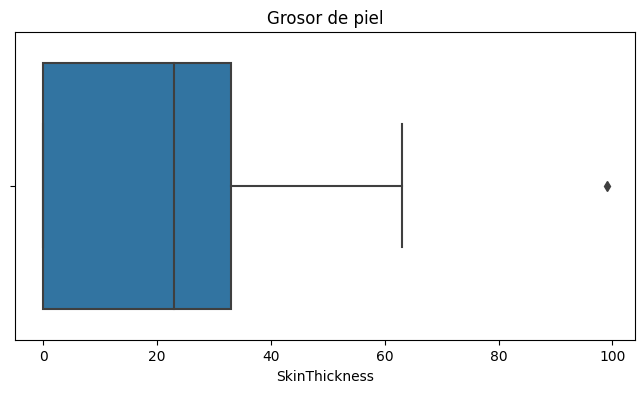

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='SkinThickness', data=df_b)
plt.title('Grosor de piel')
plt.show()

In [25]:
print(df_b['SkinThickness'].value_counts().sort_index())

SkinThickness
0     194
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     19
19     17
20     11
21     10
22     16
23     21
24     12
25     15
26     16
27     23
28     20
29     17
30     25
31     19
32     29
33     20
34      8
35     14
36     14
37     16
38      6
39     18
40     16
41     13
42     10
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: count, dtype: int64


In [26]:
print("Registros antes de borrar los valores de 0 y 99 en grosor de piel:", len(df_b))
df_b = df_b[df_b['SkinThickness'] != 0]
df_b = df_b[df_b['SkinThickness'] != 99]
print("Registros después de borrar los valores de 0 y 99 en grosor de piel:", len(df_b))


Registros antes de borrar los valores de 0 y 99 en grosor de piel: 720
Registros después de borrar los valores de 0 y 99 en grosor de piel: 525


In [27]:
print(df_b['Insulin'].value_counts().sort_index())

Insulin
0      139
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: count, Length: 184, dtype: int64


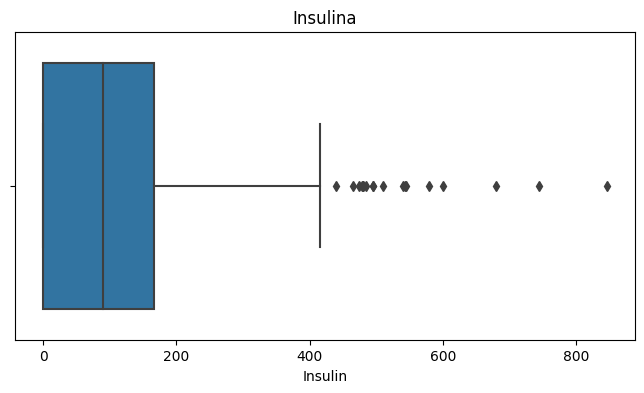

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Insulin', data=df_b)
plt.title('Insulina')
plt.show()

In [29]:
df_b[df_b['Insulin'] > 500].shape[0]


9

In [30]:
print("Registros antes de borrar los que tienen 0 o menores a 500 de insulina:", len(df_b))
df_b = df_b[df_b['Insulin'] <= 500]
df_b = df_b[df_b['Insulin'] != 0]
print("Registros después de borrar los que tienen 0 o menores a 500 de insulina:", len(df_b))

Registros antes de borrar los que tienen 0 o menores a 500 de insulina: 525
Registros después de borrar los que tienen 0 o menores a 500 de insulina: 377


In [31]:
print(df_b['BMI'].value_counts().sort_index())

BMI
0.0     1
18.2    1
19.3    1
19.4    1
19.5    2
       ..
49.7    1
53.2    1
57.3    1
59.4    1
67.1    1
Name: count, Length: 190, dtype: int64


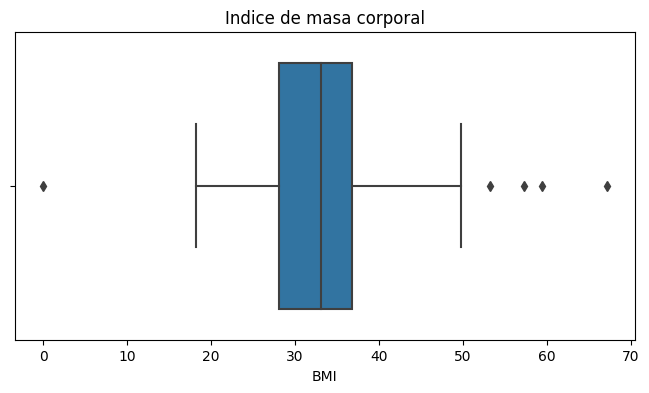

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='BMI', data=df_b)
plt.title('Indice de masa corporal')
plt.show()

In [33]:
print("Registros antes de borrar los que tienen 0 mayor a 53 en IMC:", len(df_b))
df_b = df_b[df_b['BMI'] != 0]
df_b = df_b[df_b['BMI'] < 53.2]
print("Registros después de borrar los que tienen 0 mayor a 53 en IMC:", len(df_b))

Registros antes de borrar los que tienen 0 mayor a 53 en IMC: 377
Registros después de borrar los que tienen 0 mayor a 53 en IMC: 372


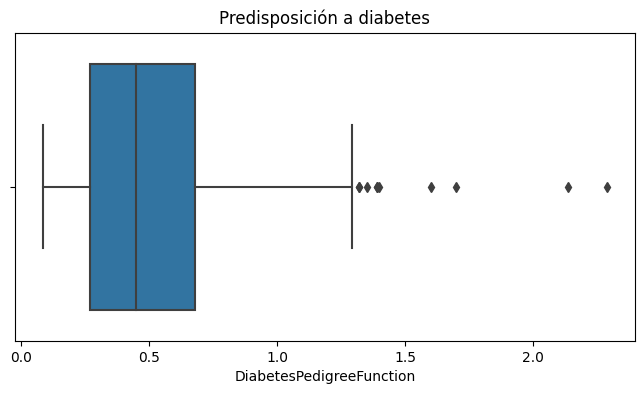

In [34]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='DiabetesPedigreeFunction', data=df_b)
plt.title('Predisposición a diabetes')
plt.show()

In [35]:
print(df_b['DiabetesPedigreeFunction'].value_counts().sort_index())

DiabetesPedigreeFunction
0.085    1
0.088    1
0.089    1
0.101    1
0.107    1
        ..
1.400    1
1.600    1
1.699    1
2.137    1
2.288    1
Name: count, Length: 314, dtype: int64


In [36]:
print("Registros antes de borrar algo de la predispoción a tener diabetes:", len(df_b))
df_b = df_b[(df_b['DiabetesPedigreeFunction'] >= 0.1) & (df_b['DiabetesPedigreeFunction'] <= 2.0)]
print("Registros después de borrar algo de la predispoción a tener diabetes", len(df_b))

Registros antes de borrar algo de la predispoción a tener diabetes: 372
Registros después de borrar algo de la predispoción a tener diabetes 367


In [37]:
print(df_b['Age'].value_counts().sort_index())

Age
21    32
22    42
23    27
24    30
25    26
26    20
27    14
28    20
29    14
30    10
31    10
32     6
33     9
34     7
35     6
36     7
37     8
38     3
39     7
40     6
41     5
42     7
43     8
44     1
45     4
46     4
47     2
48     3
49     2
50     2
51     6
52     1
53     2
54     2
55     2
56     1
57     2
58     4
60     2
61     1
63     1
81     1
Name: count, dtype: int64


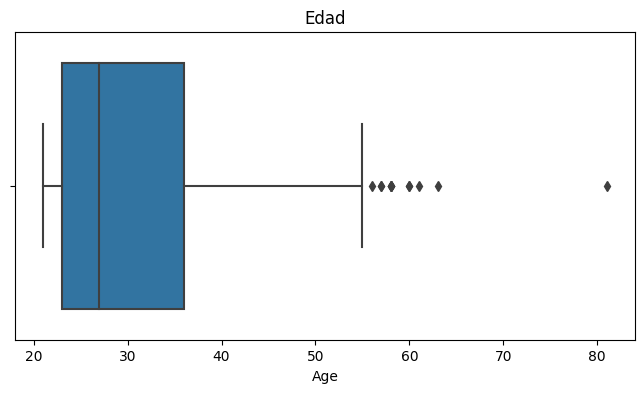

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Age', data=df_b)
plt.title('Edad')
plt.show()

In [39]:
# En caso de que la clase fuera algo cómo positiva o negativa, 
# Convierte a binario: 1 = Positive, 0 = Negative
# df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})


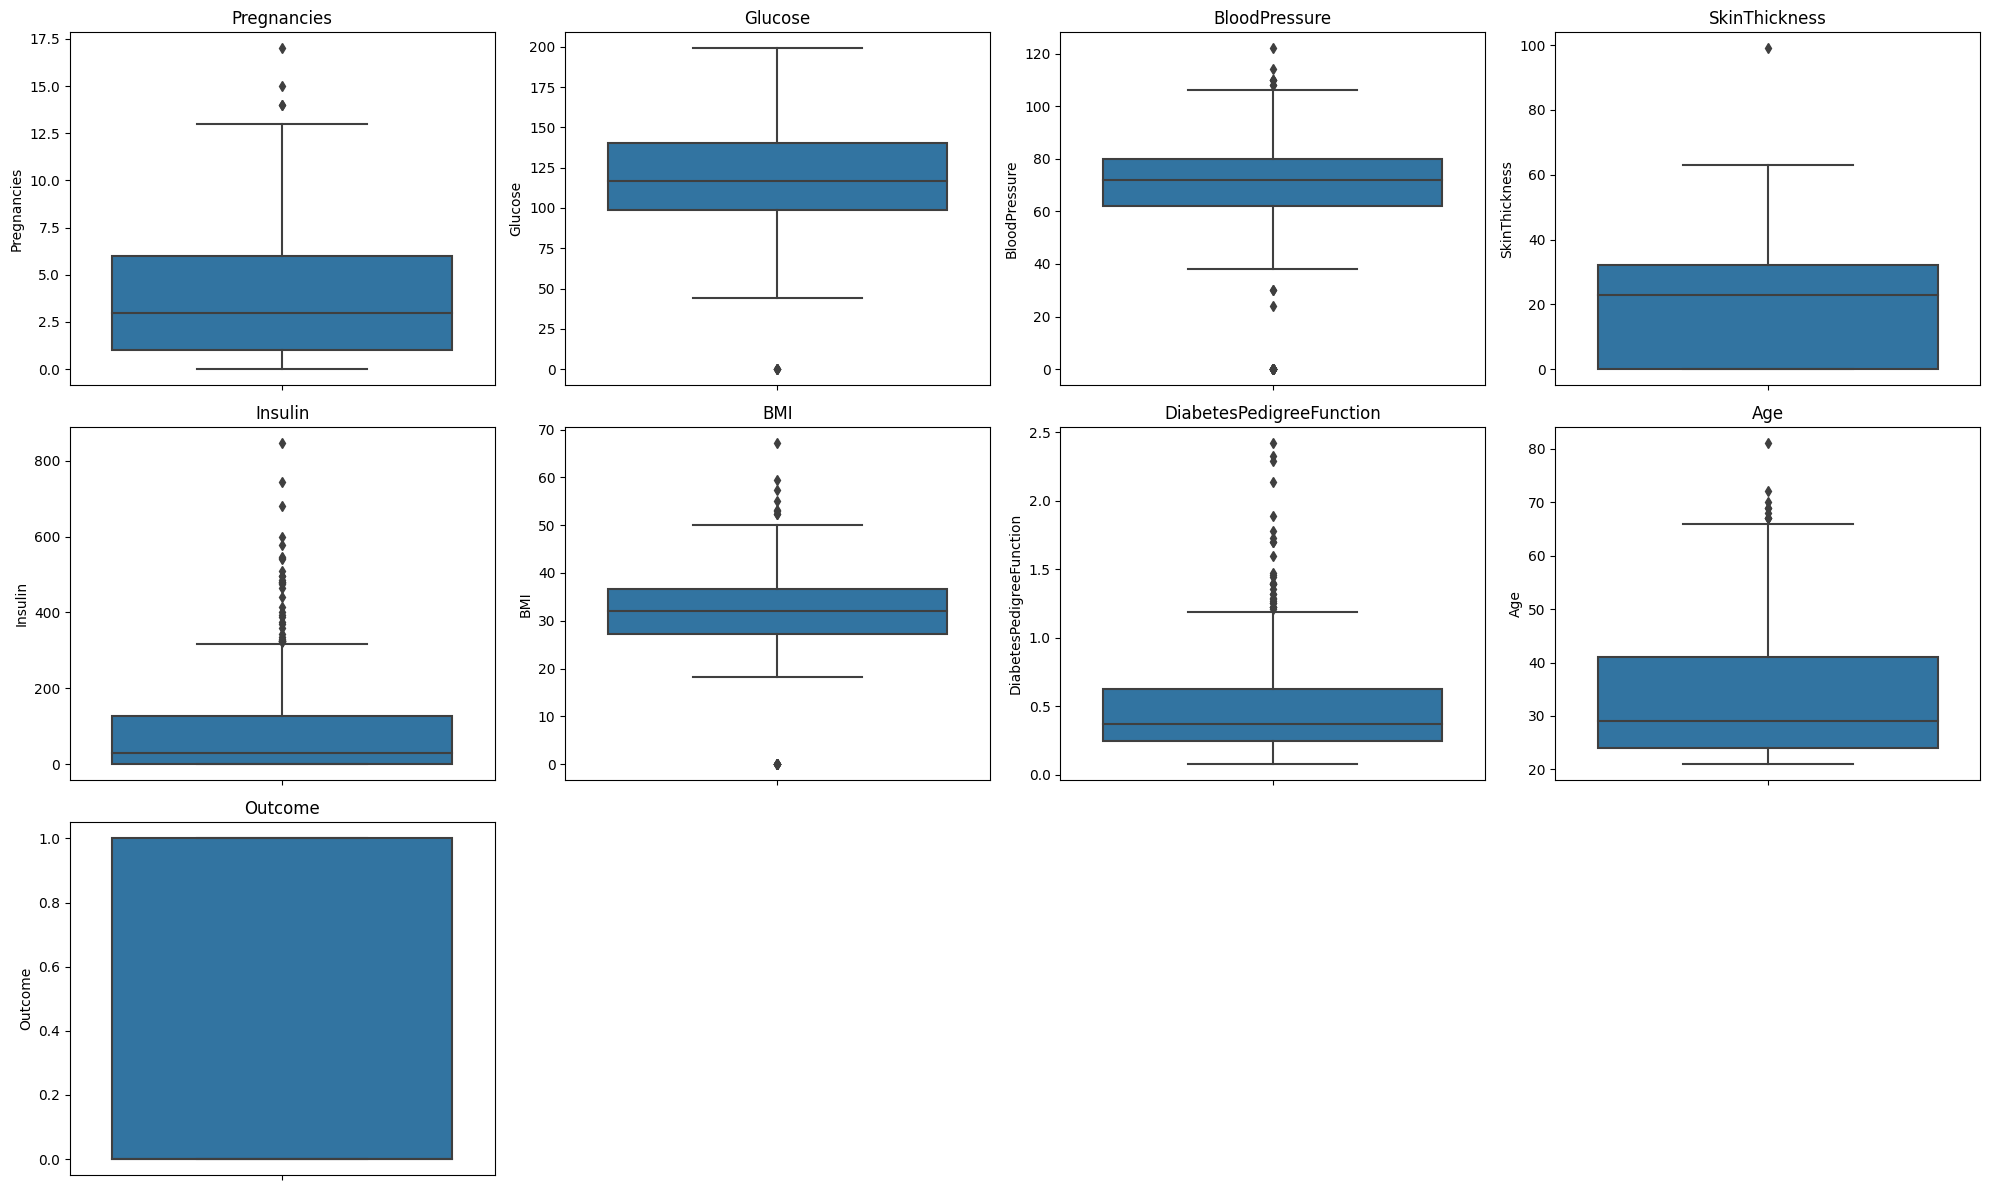

In [40]:
numeric_cols = df_c.select_dtypes(exclude='object').columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_c[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [41]:
numeric_cols = df_c.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df_c[col].quantile(0.25)
    Q3 = df_c[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_c[(df_c[col] < lower) | (df_c[col] > upper)]
    print(f"Valores recortados en {col}: {outliers.shape[0]}")

Valores recortados en Pregnancies: 4
Valores recortados en Glucose: 5
Valores recortados en BloodPressure: 45
Valores recortados en SkinThickness: 1
Valores recortados en Insulin: 34
Valores recortados en BMI: 19
Valores recortados en DiabetesPedigreeFunction: 29
Valores recortados en Age: 9
Valores recortados en Outcome: 0


In [42]:
numeric_cols = df_c.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df_c[col].quantile(0.25)
    Q3 = df_c[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_c[col] = df_c[col].clip(lower=lower, upper=upper)

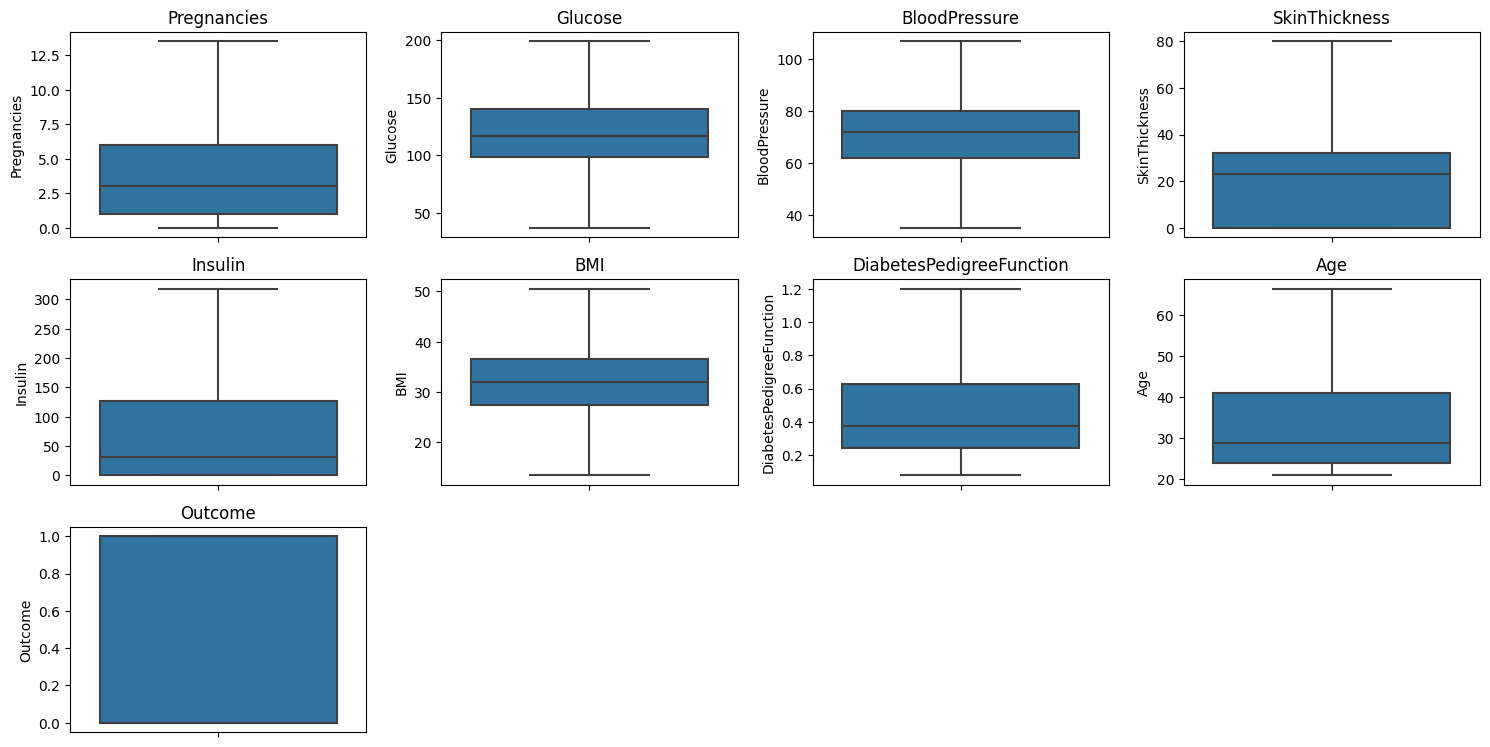

In [43]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_c.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_c[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [44]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_impute:
    median_value = df_d[col].median()
    df_d[col] = df_d[col].replace(0, median_value)


In [45]:
for col in cols_to_impute:
    print(f"{col}: {(df_d[col] == 0).sum()} ceros restantes")


Glucose: 0 ceros restantes
BloodPressure: 0 ceros restantes
SkinThickness: 0 ceros restantes
Insulin: 0 ceros restantes
BMI: 0 ceros restantes


In [46]:
datasets = {
    'Original': df_original,
    'Limpieza manual (df_b)': df_b,
    'Con clip (df_c)': df_c,
    'Con imputación (df_d)': df_d
}

for name, df in datasets.items():
    print(f"\n🔍 Correlación con 'Outcome' en {name}:")
    print(df.corr()['Outcome'].sort_values(ascending=False))



🔍 Correlación con 'Outcome' en Original:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

🔍 Correlación con 'Outcome' en Limpieza manual (df_b):
Outcome                     1.000000
Glucose                     0.515473
Age                         0.349566
Insulin                     0.320706
Pregnancies                 0.265999
BMI                         0.248377
SkinThickness               0.223329
BloodPressure               0.217601
DiabetesPedigreeFunction    0.206793
Name: Outcome, dtype: float64

🔍 Correlación con 'Outcome' en Con clip (df_c):
Outcome                     1.000000
Glucose                     0.479158
BMI                         0.309739
Age             

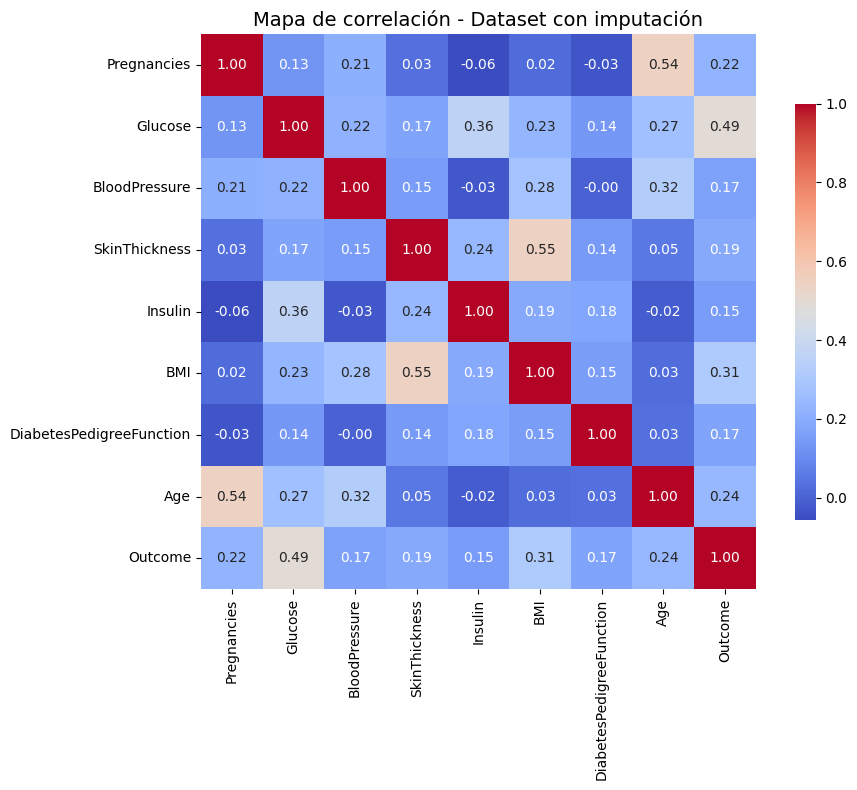

In [47]:
# Elige el dataset que quieras visualizar:
df_to_plot = df_d  # puedes cambiar a df_original, df_b, df_c, df_d

plt.figure(figsize=(10, 8))
sns.heatmap(df_to_plot.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})
plt.title("Mapa de correlación - Dataset con imputación", fontsize=14)
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

def evaluar_logistic_regression_escalado(df, nombre):
    # Separar variables
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    # Escalar variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

    # Modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predicción
    y_pred = model.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Resultados
    print(f"\n📊 Resultados para {nombre}:")
    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1 Score:  {f1*100:.2f}%")
    print("Clasificación por clase:")
    print(classification_report(y_test, y_pred))

In [50]:
# Diccionario con datasets
datasets = {
    'Original': df_original,
    'Manual (df_b)': df_b,
    'Clip (df_c)': df_c,
    'Imputación (df_d)': df_d
}

# Evaluar todos
for nombre, df in datasets.items():
    evaluar_logistic_regression_escalado(df, nombre)



📊 Resultados para Original:
Accuracy:  82.47%
Precision: 81.99%
Recall:    82.47%
F1 Score:  81.89%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154


📊 Resultados para Manual (df_b):
Accuracy:  78.38%
Precision: 79.04%
Recall:    78.38%
F1 Score:  77.70%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.83      0.61      0.70        31

    accuracy                           0.78        74
   macro avg       0.80      0.76      0.77        74
weighted avg       0.79      0.78      0.78        74


📊 Resultados para Clip (df_c):
Accuracy:  81.82%
Precision: 81.30%
Recall:    81.82%
F1 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluar_random_forest(df, nombre):
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)
    
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n📊 Resultados para {nombre} (Random Forest):")
    print(f"Accuracy:  {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall:    {rec*100:.2f}%")
    print(f"F1 Score:  {f1*100:.2f}%")
    print("Clasificación por clase:")
    print(classification_report(y_test, y_pred))

In [66]:
# Datasets a comparar
datasets = {
    'Original': df_original,
    'Manual (df_b)': df_b,
    'Clip (df_c)': df_c,
    'Imputación (df_d)': df_d
}

# Ejecutar evaluación
for nombre, df in datasets.items():
    evaluar_random_forest(df, nombre)


📊 Resultados para Original (Random Forest):
Accuracy:  78.57%
Precision: 78.23%
Recall:    78.57%
F1 Score:  78.37%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154


📊 Resultados para Manual (df_b) (Random Forest):
Accuracy:  81.08%
Precision: 82.00%
Recall:    81.08%
F1 Score:  80.48%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        43
           1       0.87      0.65      0.74        31

    accuracy                           0.81        74
   macro avg       0.83      0.79      0.80        74
weighted avg       0.82      0.81      0.80        74


📊 Resultados para Clip (df_c) (Random Forest):
Accuracy:

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluar_mlp(df, nombre):
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    # Escalado
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # División
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=0)
    
    # Modelo
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
    model.fit(X_train, y_train)
    
    # Predicción
    y_pred = model.predict(X_test)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n📊 Resultados para {nombre} (MLPClassifier):")
    print(f"Accuracy:  {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall:    {rec*100:.2f}%")
    print(f"F1 Score:  {f1*100:.2f}%")
    print("Clasificación por clase:")
    print(classification_report(y_test, y_pred))

In [68]:
# Datasets a evaluar
datasets = {
    'Original': df_original,
    'Manual (df_b)': df_b,
    'Clip (df_c)': df_c,
    'Imputación (df_d)': df_d
}

# Ejecutar evaluaciones
for nombre, df in datasets.items():
    evaluar_mlp(df, nombre)


📊 Resultados para Original (MLPClassifier):
Accuracy:  81.82%
Precision: 81.62%
Recall:    81.82%
F1 Score:  81.70%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Manual (df_b) (MLPClassifier):
Accuracy:  79.73%
Precision: 79.84%
Recall:    79.73%
F1 Score:  79.40%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.81      0.68      0.74        31

    accuracy                           0.80        74
   macro avg       0.80      0.78      0.79        74
weighted avg       0.80      0.80      0.79        74


📊 Resultados para Clip (df_c) (MLPClassifier):
Accuracy:  79.87%
Precision: 79.75%
Recall:    79.87%
F1 Score:  79.81%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154


📊 Resultados para Imputación (df_d) (MLPClassifier):


In [69]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

def evaluar_xgboost(df, nombre, escalar=False):
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    # Escalado opcional
    if escalar:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n📊 Resultados para {nombre} (XGBoost):")
    print(f"Accuracy:  {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall:    {rec*100:.2f}%")
    print(f"F1 Score:  {f1*100:.2f}%")
    print("Clasificación por clase:")
    print(classification_report(y_test, y_pred))


# Ejecutar con los 4 datasets
datasets = {
    'Original': df_original,
    'Manual (df_b)': df_b,
    'Clip (df_c)': df_c,
    'Imputación (df_d)': df_d
}

for nombre, df in datasets.items():
    evaluar_xgboost(df, nombre)



📊 Resultados para Original (XGBoost):
Accuracy:  79.87%
Precision: 80.92%
Recall:    79.87%
F1 Score:  80.23%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       107
           1       0.65      0.74      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154


📊 Resultados para Manual (df_b) (XGBoost):
Accuracy:  79.73%
Precision: 80.23%
Recall:    79.73%
F1 Score:  79.20%
Clasificación por clase:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        43
           1       0.83      0.65      0.73        31

    accuracy                           0.80        74
   macro avg       0.81      0.78      0.78        74
weighted avg       0.80      0.80      0.79        74


📊 Resultados para Clip (df_c) (XGBoost):
Accuracy:  80.52%
Precision